In [21]:

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(context="notebook", style="whitegrid")

# Increase default font sizes a bit for report-quality figures
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["figure.dpi"] = 120


In [22]:
# %%
EXCEL_PATH = r"C:\Users\kfq6\Documents\Data\Sammedag_master_HbA1c_Features.xlsx"

TARGET_COLS = [
    "LABmean__hb_b_haemoglobin_a1c_ifcc_mmol_mol",   # HbA1c
    "LABmean__p_kolesterol_ldl_mmol_l",              # LDL
    "LABmean__egfr_1_73m2_ckd_epi_ml_min",           # eGFR
]

# Human-readable names for plotting
nice_names = {
    "LABmean__hb_b_haemoglobin_a1c_ifcc_mmol_mol": "HbA1c (mmol/mol)",
    "LABmean__p_kolesterol_ldl_mmol_l": "LDL cholesterol (mmol/L)",
    "LABmean__egfr_1_73m2_ckd_epi_ml_min": "eGFR (mL/min/1.73m²)",
}

df = pd.read_excel(EXCEL_PATH)

df_targets = df[TARGET_COLS].copy()

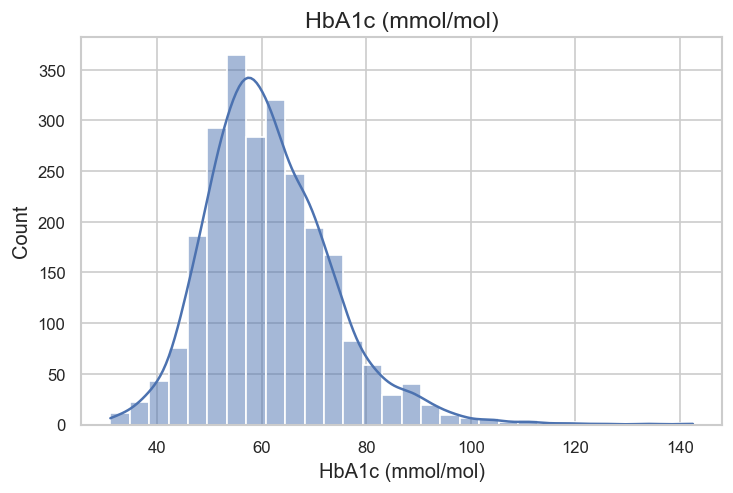

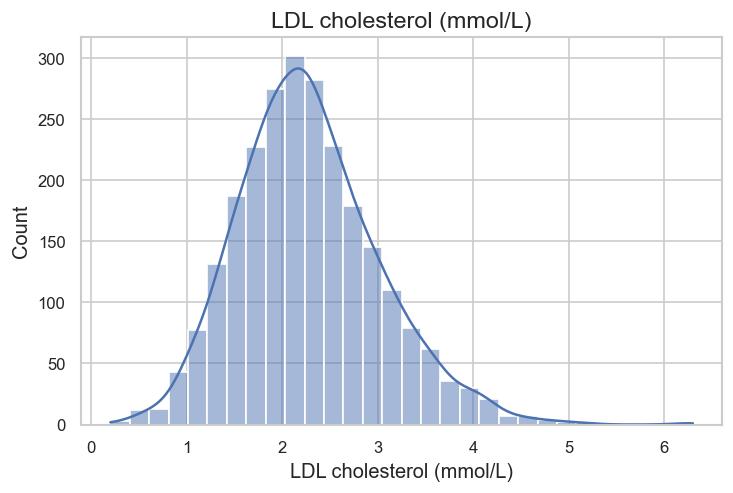

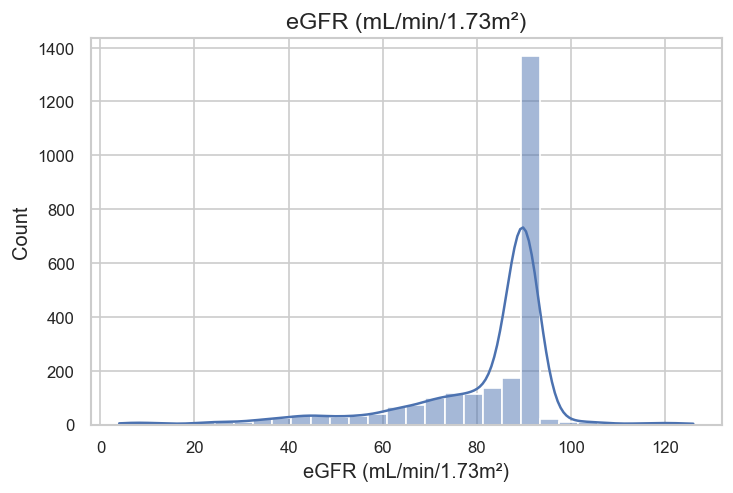

,LABmean__hb_b_haemoglobin_a1c_ifcc_mmol_mol,LABmean__p_kolesterol_ldl_mmol_l,LABmean__egfr_1_73m2_ckd_epi_ml_min
count,2466.000000,2466.000000,2466.000000
mean,61.465167,2.283445,81.598285
std,12.100369,0.741261,16.150562
min,31.000000,0.200000,4.000000
25%,53.000000,1.800000,78.000000
50%,60.000000,2.200000,90.000000
75%,68.500000,2.700000,90.000000
max,142.500000,6.300000,126.000000


In [23]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

for col in TARGET_COLS:
    fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)

    sns.histplot(df_targets[col], kde=True, ax=ax, bins=30)

    ax.set_title(nice_names[col])
    ax.set_xlabel(nice_names[col])
    ax.set_ylabel("Count")

    plt.show()

df_targets.describe()


In [28]:
import pandas as pd

# Path to your file
EXCEL_PATH = r"C:\Users\kfq6\Documents\Data\Sammedag_master_HbA1c_Features.xlsx"
#EXCEL_PATH = (r"C:\Users\kfq6\Documents\Data\Sammedag_master_means_4m2m_3to4.xlsx")
ID_COL = "DW_EK_Borger"
DIAG_COL = "diagnosis"
AGE_COL = "age"
YEAR_COL = "year"

# Read data
df = pd.read_excel(EXCEL_PATH)

# ---------- PATIENT-LEVEL TABLE ----------
# One row per patient with diagnosis + age
patients = (
    df[[ID_COL, DIAG_COL, AGE_COL]]
    .drop_duplicates()
    .reset_index(drop=True)
)

print("Number of unique patients:", len(patients))

# Diabetes types (patient-level)
print("\nDiabetes types (counts):")
print(patients[DIAG_COL].value_counts())

print("\nDiabetes types (percent):")
print((patients[DIAG_COL].value_counts(normalize=True) * 100).round(1))

# Age summary
print("\nAge summary (years):")
print(patients[AGE_COL].describe().round(2))

# ---------- SCREENINGS PER PATIENT ----------
# Count how many sammedag-screeninger (unique years) per patient
screenings_per_patient = (
    df.groupby(ID_COL)[YEAR_COL]
      .nunique()
)

print("\nScreenings per patient (distribution):")
print(screenings_per_patient.value_counts().sort_index())

# Specifically 3 vs 4 sammedagsscreeninger
n_2 = (screenings_per_patient == 2).sum()
n_3 = (screenings_per_patient == 3).sum()
n_4 = (screenings_per_patient == 4).sum()
n_5 = (screenings_per_patient == 5).sum()

print(f"\nPatients with 2 sammedagsscreeninger: {n_2}")
print(f"\nPatients with 3 sammedagsscreeninger: {n_3}")
print(f"Patients with 4 sammedagsscreeninger: {n_4}")
print(f"Patients with 5 sammedagsscreeninger: {n_5}")


Number of unique patients: 808

Diabetes types (counts):
diagnosis
Type 1-diabetes               669
Type 2-diabetes               118
Andre former for diabetes      20
Ikke specificeret diabetes      1
Name: count, dtype: int64

Diabetes types (percent):
diagnosis
Type 1-diabetes               82.8
Type 2-diabetes               14.6
Andre former for diabetes      2.5
Ikke specificeret diabetes     0.1
Name: proportion, dtype: float64

Age summary (years):
count    808.00
mean      55.09
std       16.11
min       22.20
25%       42.48
50%       56.40
75%       68.50
max       90.30
Name: age, dtype: float64

Screenings per patient (distribution):
year
2     11
3    764
4     33
Name: count, dtype: int64

Patients with 2 sammedagsscreeninger: 11

Patients with 3 sammedagsscreeninger: 764
Patients with 4 sammedagsscreeninger: 33
Patients with 5 sammedagsscreeninger: 0


In [29]:
import pandas as pd

EXCEL_PATH = r"C:\Users\kfq6\Documents\Data\Sammedag_master_HbA1c_Features.xlsx"
ID_COL = "DW_EK_Borger"

df = pd.read_excel(EXCEL_PATH)

# Group: how many rows vs how many unique years per patient
grp = df.groupby(ID_COL).agg(
    n_rows=('year', 'size'),
    n_years=('year', 'nunique')
)

# Patients with 3 rows but only 2 distinct years
sus = grp[(grp['n_rows'] == 3) & (grp['n_years'] == 2)]
print("Suspicious patients (3 rows, 2 years):", len(sus))
print(sus.head())

sus_ids = sus.index.tolist()


Suspicious patients (3 rows, 2 years): 11
              n_rows  n_years
DW_EK_Borger                 
16209              3        2
150808             3        2
190294             3        2
256237             3        2
274013             3        2


In [30]:
cols_to_show = [
    ID_COL, 'anchor_date', 'year',
    'LABmean__hb_b_haemoglobin_a1c_ifcc_mmol_mol',
    'LABmean__p_kolesterol_ldl_mmol_l',
    'LABmean__egfr_1_73m2_ckd_epi_ml_min'
]

sus_rows = (
    df[df[ID_COL].isin(sus_ids)]
    .sort_values([ID_COL, 'anchor_date'])
    [cols_to_show]
)

print(sus_rows)


      DW_EK_Borger anchor_date  year  \
19           16209  2023-01-02  2023   
20           16209  2023-12-20  2023   
21           16209  2025-05-14  2025   
268         150808  2022-05-25  2022   
269         150808  2023-01-11  2023   
270         150808  2023-10-04  2023   
362         190294  2023-02-15  2023   
363         190294  2023-12-06  2023   
364         190294  2025-02-27  2025   
476         256237  2023-02-15  2023   
477         256237  2023-11-22  2023   
478         256237  2025-06-12  2025   
500         274013  2023-02-15  2023   
501         274013  2023-11-22  2023   
502         274013  2025-02-27  2025   
819         451959  2023-03-01  2023   
820         451959  2023-10-11  2023   
821         451959  2025-02-11  2025   
956         510378  2023-01-11  2023   
957         510378  2023-09-13  2023   
958         510378  2024-06-05  2024   
1153        623208  2023-03-01  2023   
1154        623208  2023-10-11  2023   
1155        623208  2024-12-04  2024   


In [31]:
import pandas as pd

EXCEL_PATH = r"C:\Users\kfq6\Documents\Data\Sammedag_master_HbA1c_Features.xlsx"
ID_COL = "DW_EK_Borger"

df = pd.read_excel(EXCEL_PATH)

rows_per_patient = df.groupby(ID_COL).size()

print("Total patients:", rows_per_patient.shape[0])
print("Total rows:", len(df))
print("\nRows per patient distribution:")
print(rows_per_patient.value_counts().sort_index())


Total patients: 808
Total rows: 2466

Rows per patient distribution:
3    766
4     42
Name: count, dtype: int64
